# P02_01_EDA

In [1]:
section_fig_main_title = 'P02_01_EDA_'

In [2]:
import os, sys
import requests
from urllib.parse import urljoin, urlparse
from bs4 import BeautifulSoup as bs
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pandas.plotting import lag_plot

In [3]:
from pandas.plotting import autocorrelation_plot


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [6]:
from sklearn import metrics
import statsmodels.api as sm

## Read Data

the page html file downloaded in Data directory and it is loaded below.

In [7]:
csv_path = "../Data/Data_ICME_scraped.csv"
df = pd.read_csv(csv_path, parse_dates=True)

In [8]:
df.head(2)

,Unnamed: 0,Disturbance Y/M/D (UT) (a),ICME Plasma/Field Start Y/M/D (UT) (b),ICME Plasma/Field End Y/M/D (UT) (b),Comp. Start (Hrs wrt. Plasma/ Field) (c),Comp. End (Hrs wrt. Plasma/ Field) (c),MC Start (Hrs wrt. Plasma/ Field) (d),End (Hrs wrt. Plasma/ Field) (d),BDE? (e),BIF? (f),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),V_transit (km/s) (n),LASCO CME Y/M/D (UT) (o)
0,0,1996/05/27 1500,1996/05/27 1500,1996/05/29 0300,...,...,0,+4,N,...,2,0,370,400,9,2,-33,...,NaN
1,1,1996/07/01 1320,1996/07/01 1800,1996/07/02 1100,...,...,0,0,N,...,3,40,360,370,11,2,-20,...,NaN


In [9]:
df = df.drop(columns=['Unnamed: 0'])

In [10]:
df.head()

,Disturbance Y/M/D (UT) (a),ICME Plasma/Field Start Y/M/D (UT) (b),ICME Plasma/Field End Y/M/D (UT) (b),Comp. Start (Hrs wrt. Plasma/ Field) (c),Comp. End (Hrs wrt. Plasma/ Field) (c),MC Start (Hrs wrt. Plasma/ Field) (d),End (Hrs wrt. Plasma/ Field) (d),BDE? (e),BIF? (f),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),V_transit (km/s) (n),LASCO CME Y/M/D (UT) (o)
0,1996/05/27 1500,1996/05/27 1500,1996/05/29 0300,...,...,0,+4,N,...,2,0,370,400,9,2,-33,...,NaN
1,1996/07/01 1320,1996/07/01 1800,1996/07/02 1100,...,...,0,0,N,...,3,40,360,370,11,2,-20,...,NaN
2,1996/08/07 0600,1996/08/07 1200,1996/08/08 1000,...,...,0,0,N,...,2,10,350,380,7,2,-23,...,NaN
3,1996/12/23 1600,1996/12/23 1700,1996/12/25 1100,...,...,+10,0,N,...,2,20,360,420,10,2,-18,435,1996/12/19 1630 H
4,1997/01/10 0104,1997/01/10 0400,1997/01/11 0200,...,...,0,0,Y,...,1,100 S,450,460,14,2,-78,507,1997/01/06 1510 H


In [11]:
df.isnull().sum()

Disturbance Y/M/D (UT) (a)                    0
ICME Plasma/Field Start Y/M/D (UT) (b)        0
ICME Plasma/Field End Y/M/D (UT) (b)          0
Comp. Start (Hrs wrt. Plasma/ Field) (c)      0
Comp. End (Hrs wrt. Plasma/ Field) (c)        0
MC Start (Hrs wrt. Plasma/ Field) (d)         0
End (Hrs wrt. Plasma/ Field) (d)              0
BDE? (e)                                      0
BIF? (f)                                      0
Qual. (g)                                     0
dV (km/s) (h)                                 0
V_ICME (km/s) (i)                             0
V_max (km/s) (j)                              0
B (nT) (k)                                    0
MC? (l)                                       0
Dst (nT) (m)                                  0
V_transit (km/s) (n)                          1
LASCO CME Y/M/D (UT) (o)                    235
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 18 columns):
Disturbance Y/M/D (UT) (a)                  513 non-null object
ICME Plasma/Field Start Y/M/D (UT) (b)      513 non-null object
ICME Plasma/Field End Y/M/D (UT) (b)        513 non-null object
Comp. Start (Hrs wrt. Plasma/ Field) (c)    513 non-null object
Comp. End (Hrs wrt. Plasma/ Field) (c)      513 non-null object
MC Start (Hrs wrt. Plasma/ Field) (d)       513 non-null object
End (Hrs wrt. Plasma/ Field) (d)            513 non-null object
BDE? (e)                                    513 non-null object
BIF? (f)                                    513 non-null object
Qual. (g)                                   513 non-null object
dV (km/s) (h)                               513 non-null object
V_ICME (km/s) (i)                           513 non-null int64
V_max (km/s) (j)                            513 non-null int64
B (nT) (k)                                  513 non-null int64
MC

In [13]:
df.describe()

,V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k)
count,513.000000,513.000000,513.000000
mean,454.405458,524.795322,9.709552
std,103.537467,159.000808,4.325552
min,290.000000,310.000000,2.000000
25%,390.000000,420.000000,7.000000
50%,430.000000,490.000000,9.000000
75%,500.000000,590.000000,12.000000
max,1300.000000,1900.000000,33.000000


In [14]:
df.columns

Index(['Disturbance Y/M/D (UT) (a)', 'ICME Plasma/Field Start Y/M/D (UT) (b)',
       'ICME Plasma/Field End Y/M/D (UT) (b)',
       'Comp. Start (Hrs wrt. Plasma/ Field) (c)',
       'Comp. End (Hrs wrt. Plasma/ Field) (c)',
       'MC Start (Hrs wrt. Plasma/ Field) (d)',
       'End (Hrs wrt. Plasma/ Field) (d)', 'BDE? (e)', 'BIF? (f)', 'Qual. (g)',
       'dV (km/s) (h)', 'V_ICME (km/s) (i)', 'V_max (km/s) (j)', 'B (nT) (k)',
       'MC? (l)', 'Dst (nT) (m)', 'V_transit (km/s) (n)',
       'LASCO CME Y/M/D (UT) (o)'],
      dtype='object')

### Fixing the date time format

In [15]:
df.columns

Index(['Disturbance Y/M/D (UT) (a)', 'ICME Plasma/Field Start Y/M/D (UT) (b)',
       'ICME Plasma/Field End Y/M/D (UT) (b)',
       'Comp. Start (Hrs wrt. Plasma/ Field) (c)',
       'Comp. End (Hrs wrt. Plasma/ Field) (c)',
       'MC Start (Hrs wrt. Plasma/ Field) (d)',
       'End (Hrs wrt. Plasma/ Field) (d)', 'BDE? (e)', 'BIF? (f)', 'Qual. (g)',
       'dV (km/s) (h)', 'V_ICME (km/s) (i)', 'V_max (km/s) (j)', 'B (nT) (k)',
       'MC? (l)', 'Dst (nT) (m)', 'V_transit (km/s) (n)',
       'LASCO CME Y/M/D (UT) (o)'],
      dtype='object')

In [16]:
df['ICME Plasma/Field Start Y/M/D (UT) (b)'].head()

0    1996/05/27 1500
1    1996/07/01 1800
2    1996/08/07 1200
3    1996/12/23 1700
4    1997/01/10 0400
Name: ICME Plasma/Field Start Y/M/D (UT) (b), dtype: object

As it is seen, the format of data is as follow ```1997/01/10 0400```.
Let's fix the format below.

For example:

In [17]:
str_ = '1997/01/10 0400'

date_object = pd.to_datetime(str_, infer_datetime_format=True)
date_object 

Timestamp('1997-01-10 04:00:00')

fix the date time fol columns ```ICME Plasma/Field Start Y/M/D (UT) (b)``` and ```ICME Plasma/Field End Y/M/D (UT) (b)``` as follow.

In [18]:
df['ICME Plasma/Field Start Y/M/D (UT) (b)'] = pd.to_datetime(df['ICME Plasma/Field Start Y/M/D (UT) (b)'], infer_datetime_format=True)
df.head()

,Disturbance Y/M/D (UT) (a),ICME Plasma/Field Start Y/M/D (UT) (b),ICME Plasma/Field End Y/M/D (UT) (b),Comp. Start (Hrs wrt. Plasma/ Field) (c),Comp. End (Hrs wrt. Plasma/ Field) (c),MC Start (Hrs wrt. Plasma/ Field) (d),End (Hrs wrt. Plasma/ Field) (d),BDE? (e),BIF? (f),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),V_transit (km/s) (n),LASCO CME Y/M/D (UT) (o)
0,1996/05/27 1500,1996-05-27 15:00:00,1996/05/29 0300,...,...,0,+4,N,...,2,0,370,400,9,2,-33,...,NaN
1,1996/07/01 1320,1996-07-01 18:00:00,1996/07/02 1100,...,...,0,0,N,...,3,40,360,370,11,2,-20,...,NaN
2,1996/08/07 0600,1996-08-07 12:00:00,1996/08/08 1000,...,...,0,0,N,...,2,10,350,380,7,2,-23,...,NaN
3,1996/12/23 1600,1996-12-23 17:00:00,1996/12/25 1100,...,...,+10,0,N,...,2,20,360,420,10,2,-18,435,1996/12/19 1630 H
4,1997/01/10 0104,1997-01-10 04:00:00,1997/01/11 0200,...,...,0,0,Y,...,1,100 S,450,460,14,2,-78,507,1997/01/06 1510 H


In [19]:
df['ICME Plasma/Field End Y/M/D (UT) (b)'] = pd.to_datetime(df['ICME Plasma/Field End Y/M/D (UT) (b)'], infer_datetime_format=True)
df.head()

,Disturbance Y/M/D (UT) (a),ICME Plasma/Field Start Y/M/D (UT) (b),ICME Plasma/Field End Y/M/D (UT) (b),Comp. Start (Hrs wrt. Plasma/ Field) (c),Comp. End (Hrs wrt. Plasma/ Field) (c),MC Start (Hrs wrt. Plasma/ Field) (d),End (Hrs wrt. Plasma/ Field) (d),BDE? (e),BIF? (f),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),V_transit (km/s) (n),LASCO CME Y/M/D (UT) (o)
0,1996/05/27 1500,1996-05-27 15:00:00,1996-05-29 03:00:00,...,...,0,+4,N,...,2,0,370,400,9,2,-33,...,NaN
1,1996/07/01 1320,1996-07-01 18:00:00,1996-07-02 11:00:00,...,...,0,0,N,...,3,40,360,370,11,2,-20,...,NaN
2,1996/08/07 0600,1996-08-07 12:00:00,1996-08-08 10:00:00,...,...,0,0,N,...,2,10,350,380,7,2,-23,...,NaN
3,1996/12/23 1600,1996-12-23 17:00:00,1996-12-25 11:00:00,...,...,+10,0,N,...,2,20,360,420,10,2,-18,435,1996/12/19 1630 H
4,1997/01/10 0104,1997-01-10 04:00:00,1997-01-11 02:00:00,...,...,0,0,Y,...,1,100 S,450,460,14,2,-78,507,1997/01/06 1510 H


select four columns including ```'ICME Plasma/Field Start Y/M/D (UT) (b)', 'V_ICME (km/s) (i)','V_max (km/s) (j)','B (nT) (k)' ```.

These three main columns are:

* Mean ICME speed, based on solar wind speed observations during the period from (b) to (c) above.

* Maximum solar wind speed during the period from the disturbance (a) to the trailing edge of the ICME (c).

* Mean magnetic field strength in the ICME, based on the interval from (b) to (c), to the nearest 1 nT.

[definations](http://www.srl.caltech.edu/ACE/ASC/DATA/level3/icmetable2.htm#(k))

In [20]:
cols = ['ICME Plasma/Field Start Y/M/D (UT) (b)', 'V_ICME (km/s) (i)','V_max (km/s) (j)','B (nT) (k)']

numeric_df = df[cols]
numeric_df.head()

,ICME Plasma/Field Start Y/M/D (UT) (b),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k)
0,1996-05-27 15:00:00,370,400,9
1,1996-07-01 18:00:00,360,370,11
2,1996-08-07 12:00:00,350,380,7
3,1996-12-23 17:00:00,360,420,10
4,1997-01-10 04:00:00,450,460,14


In [21]:
numeric_df.index = numeric_df['ICME Plasma/Field Start Y/M/D (UT) (b)']
numeric_df = numeric_df.drop(['ICME Plasma/Field Start Y/M/D (UT) (b)'], axis=1)
numeric_df.head()

,V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k)
ICME Plasma/Field Start Y/M/D (UT) (b),,,
1996-05-27 15:00:00,370,400,9
1996-07-01 18:00:00,360,370,11
1996-08-07 12:00:00,350,380,7
1996-12-23 17:00:00,360,420,10
1997-01-10 04:00:00,450,460,14


In [22]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 513 entries, 1996-05-27 15:00:00 to 2021-05-26 22:00:00
Data columns (total 3 columns):
V_ICME (km/s) (i)    513 non-null int64
V_max (km/s) (j)     513 non-null int64
B (nT) (k)           513 non-null int64
dtypes: int64(3)
memory usage: 16.0 KB


In [23]:
numeric_df.describe()

,V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k)
count,513.000000,513.000000,513.000000
mean,454.405458,524.795322,9.709552
std,103.537467,159.000808,4.325552
min,290.000000,310.000000,2.000000
25%,390.000000,420.000000,7.000000
50%,430.000000,490.000000,9.000000
75%,500.000000,590.000000,12.000000
max,1300.000000,1900.000000,33.000000


## Plot data

In [24]:
plt.rcParams["font.size"] = "12"

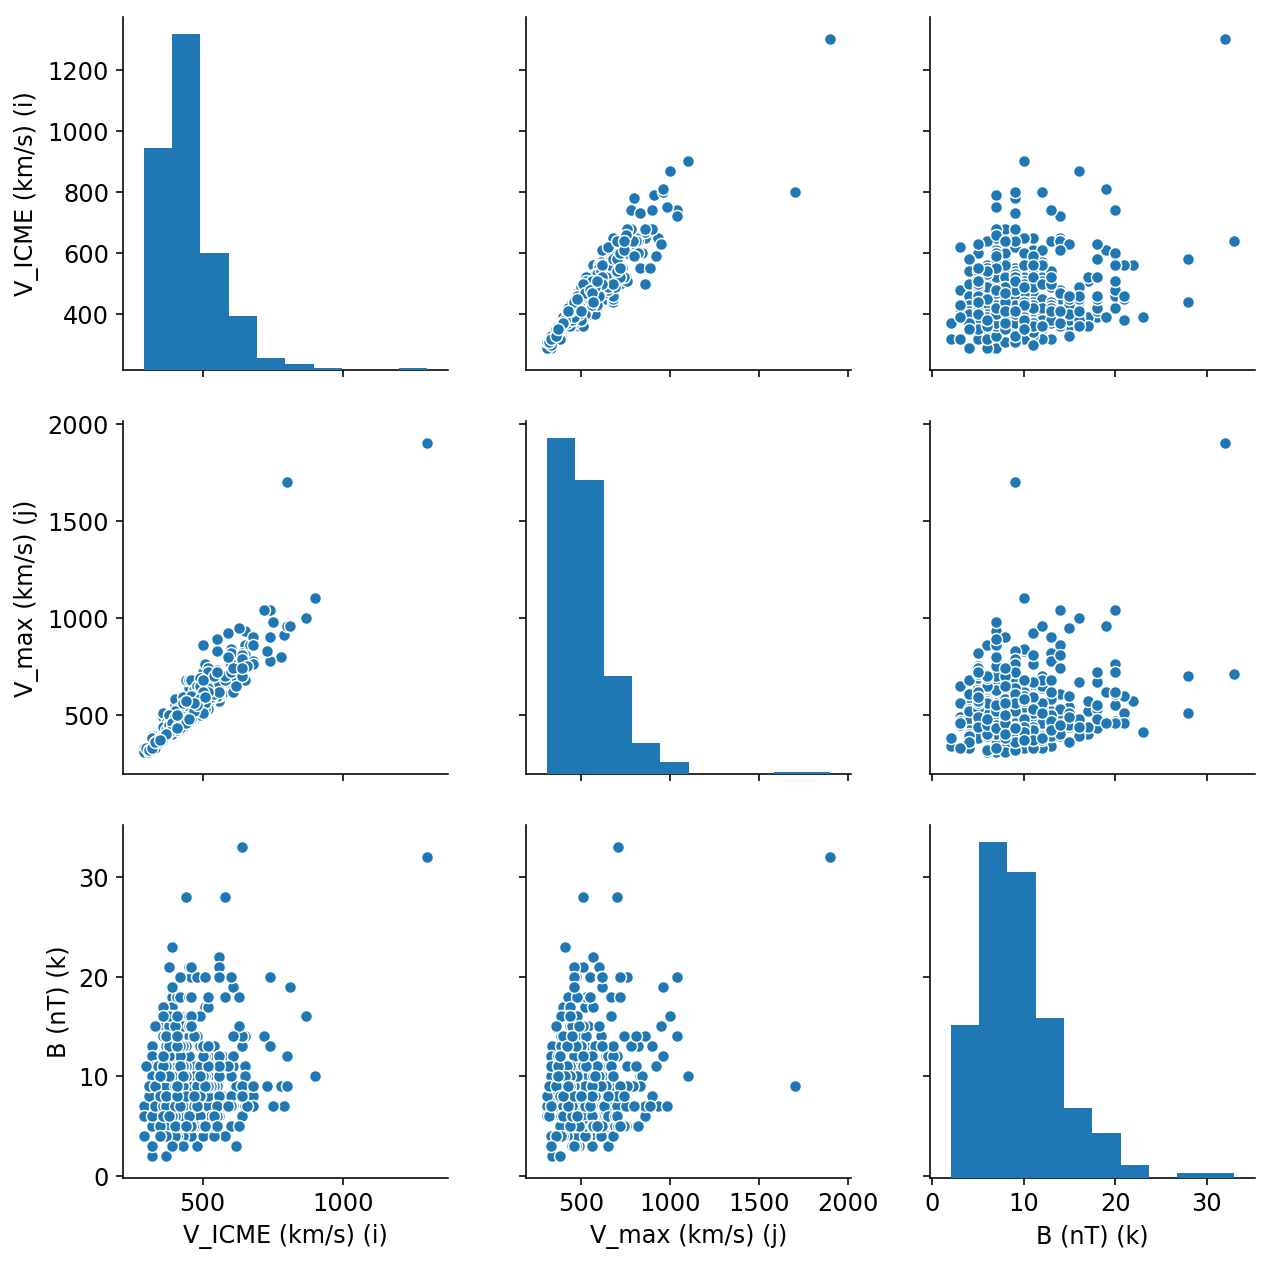

In [25]:
sns.pairplot(numeric_df, height=3)

It is seen that the numeric data distribution is a little bit skewed to right. The skewed data can be fixed using transforming. However, before transforming the data let's check out the data for outliers.

In [26]:
df.columns

Index(['Disturbance Y/M/D (UT) (a)', 'ICME Plasma/Field Start Y/M/D (UT) (b)',
       'ICME Plasma/Field End Y/M/D (UT) (b)',
       'Comp. Start (Hrs wrt. Plasma/ Field) (c)',
       'Comp. End (Hrs wrt. Plasma/ Field) (c)',
       'MC Start (Hrs wrt. Plasma/ Field) (d)',
       'End (Hrs wrt. Plasma/ Field) (d)', 'BDE? (e)', 'BIF? (f)', 'Qual. (g)',
       'dV (km/s) (h)', 'V_ICME (km/s) (i)', 'V_max (km/s) (j)', 'B (nT) (k)',
       'MC? (l)', 'Dst (nT) (m)', 'V_transit (km/s) (n)',
       'LASCO CME Y/M/D (UT) (o)'],
      dtype='object')

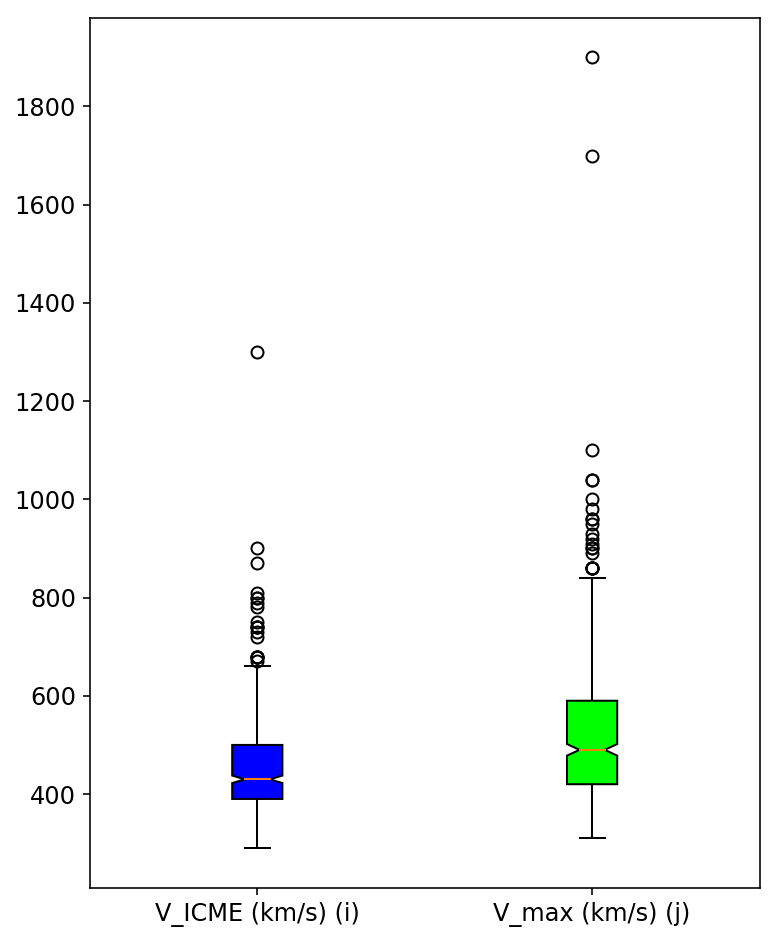

In [27]:
V_ICME = df["V_ICME (km/s) (i)"]
V_ICME_max = df['V_max (km/s) (j)']
BB = df['B (nT) (k)']

columns = [V_ICME, V_ICME_max]#, BB]
fig, ax = plt.subplots(figsize=(6,8))
box = ax.boxplot(columns, notch=True, patch_artist=True)
plt.xticks([1, 2], ['V_ICME (km/s) (i)', 'V_max (km/s) (j)'])#, 'B (nT) (k)'])

colors = ['#0000FF', '#00FF00']#'#FFFF00']#, '#FF00FF']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.savefig("../Figures/" + section_fig_main_title +"boxplot_1.png")

plt.show()

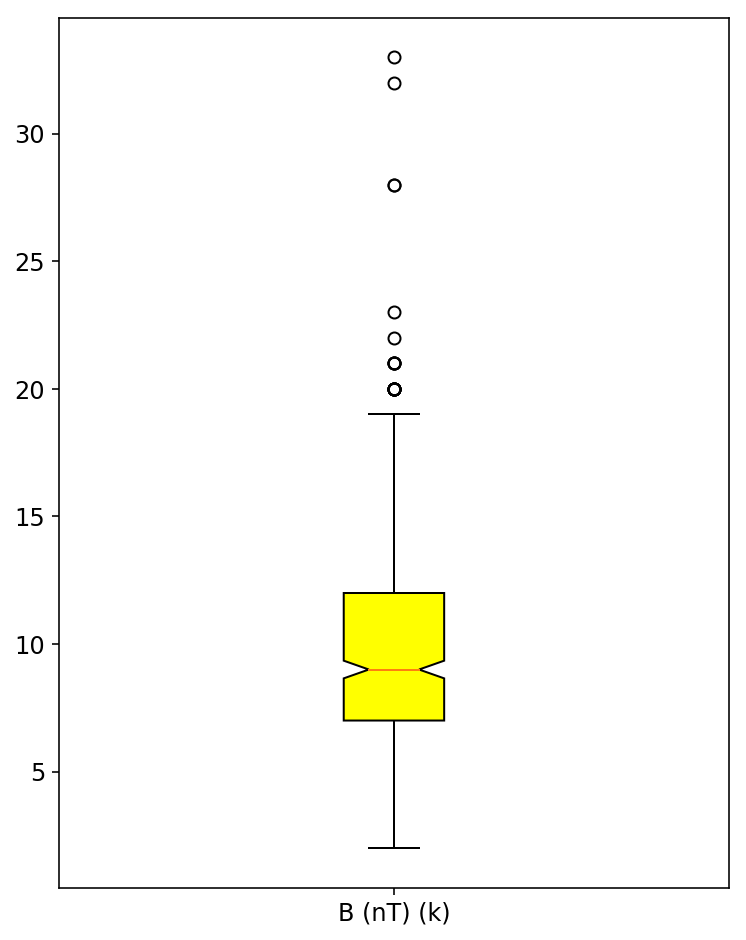

In [28]:
BB = df['B (nT) (k)']

columns = [BB]
fig, ax = plt.subplots(figsize=(6,8))
box = ax.boxplot(columns, notch=True, 
                 patch_artist=True)

plt.xticks([1], ['B (nT) (k)'])

colors = ['#FFFF00']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.savefig("../Figures/" + section_fig_main_title +"boxplot_2.png")

plt.show()

clearly, there are some outliers that we have to take care of. Before applying any transformation of numerical data, let's take a look at the categorical data.

In [29]:
df.head(2)

,Disturbance Y/M/D (UT) (a),ICME Plasma/Field Start Y/M/D (UT) (b),ICME Plasma/Field End Y/M/D (UT) (b),Comp. Start (Hrs wrt. Plasma/ Field) (c),Comp. End (Hrs wrt. Plasma/ Field) (c),MC Start (Hrs wrt. Plasma/ Field) (d),End (Hrs wrt. Plasma/ Field) (d),BDE? (e),BIF? (f),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),V_transit (km/s) (n),LASCO CME Y/M/D (UT) (o)
0,1996/05/27 1500,1996-05-27 15:00:00,1996-05-29 03:00:00,...,...,0,+4,N,...,2,0,370,400,9,2,-33,...,NaN
1,1996/07/01 1320,1996-07-01 18:00:00,1996-07-02 11:00:00,...,...,0,0,N,...,3,40,360,370,11,2,-20,...,NaN


Checking out the unique values in columns.

In [30]:
df.columns

Index(['Disturbance Y/M/D (UT) (a)', 'ICME Plasma/Field Start Y/M/D (UT) (b)',
       'ICME Plasma/Field End Y/M/D (UT) (b)',
       'Comp. Start (Hrs wrt. Plasma/ Field) (c)',
       'Comp. End (Hrs wrt. Plasma/ Field) (c)',
       'MC Start (Hrs wrt. Plasma/ Field) (d)',
       'End (Hrs wrt. Plasma/ Field) (d)', 'BDE? (e)', 'BIF? (f)', 'Qual. (g)',
       'dV (km/s) (h)', 'V_ICME (km/s) (i)', 'V_max (km/s) (j)', 'B (nT) (k)',
       'MC? (l)', 'Dst (nT) (m)', 'V_transit (km/s) (n)',
       'LASCO CME Y/M/D (UT) (o)'],
      dtype='object')

In [31]:
# df["Comp. Start (Hrs wrt. Plasma/ Field) (c)"].unique()
counts = df.nunique()
counts

Disturbance Y/M/D (UT) (a)                  513
ICME Plasma/Field Start Y/M/D (UT) (b)      513
ICME Plasma/Field End Y/M/D (UT) (b)        513
Comp. Start (Hrs wrt. Plasma/ Field) (c)     31
Comp. End (Hrs wrt. Plasma/ Field) (c)       41
MC Start (Hrs wrt. Plasma/ Field) (d)        19
End (Hrs wrt. Plasma/ Field) (d)             41
BDE? (e)                                      4
BIF? (f)                                      4
Qual. (g)                                     5
dV (km/s) (h)                                63
V_ICME (km/s) (i)                            51
V_max (km/s) (j)                             68
B (nT) (k)                                   25
MC? (l)                                       4
Dst (nT) (m)                                223
V_transit (km/s) (n)                        125
LASCO CME Y/M/D (UT) (o)                    251
dtype: int64

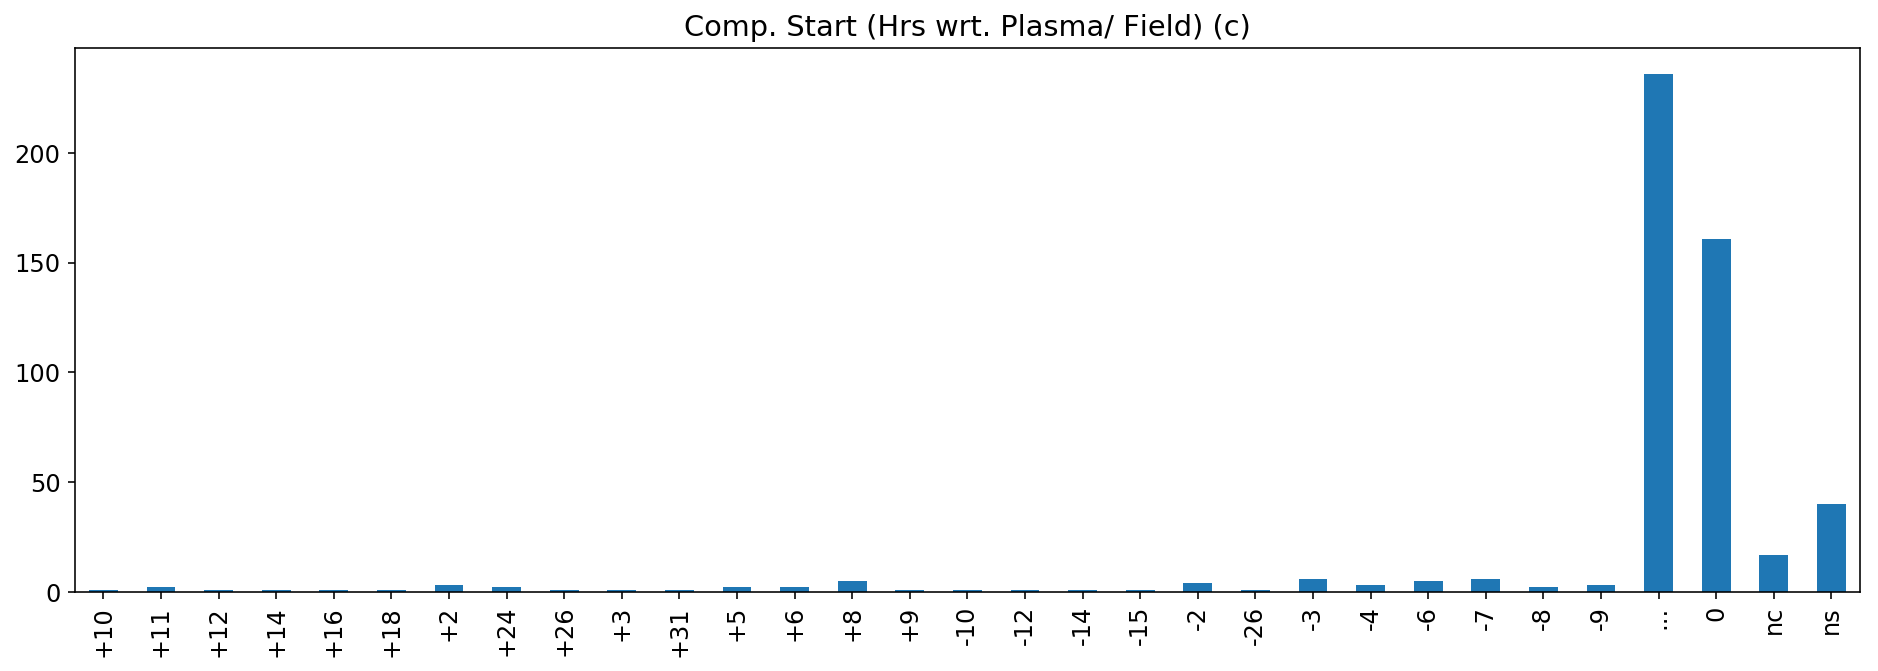

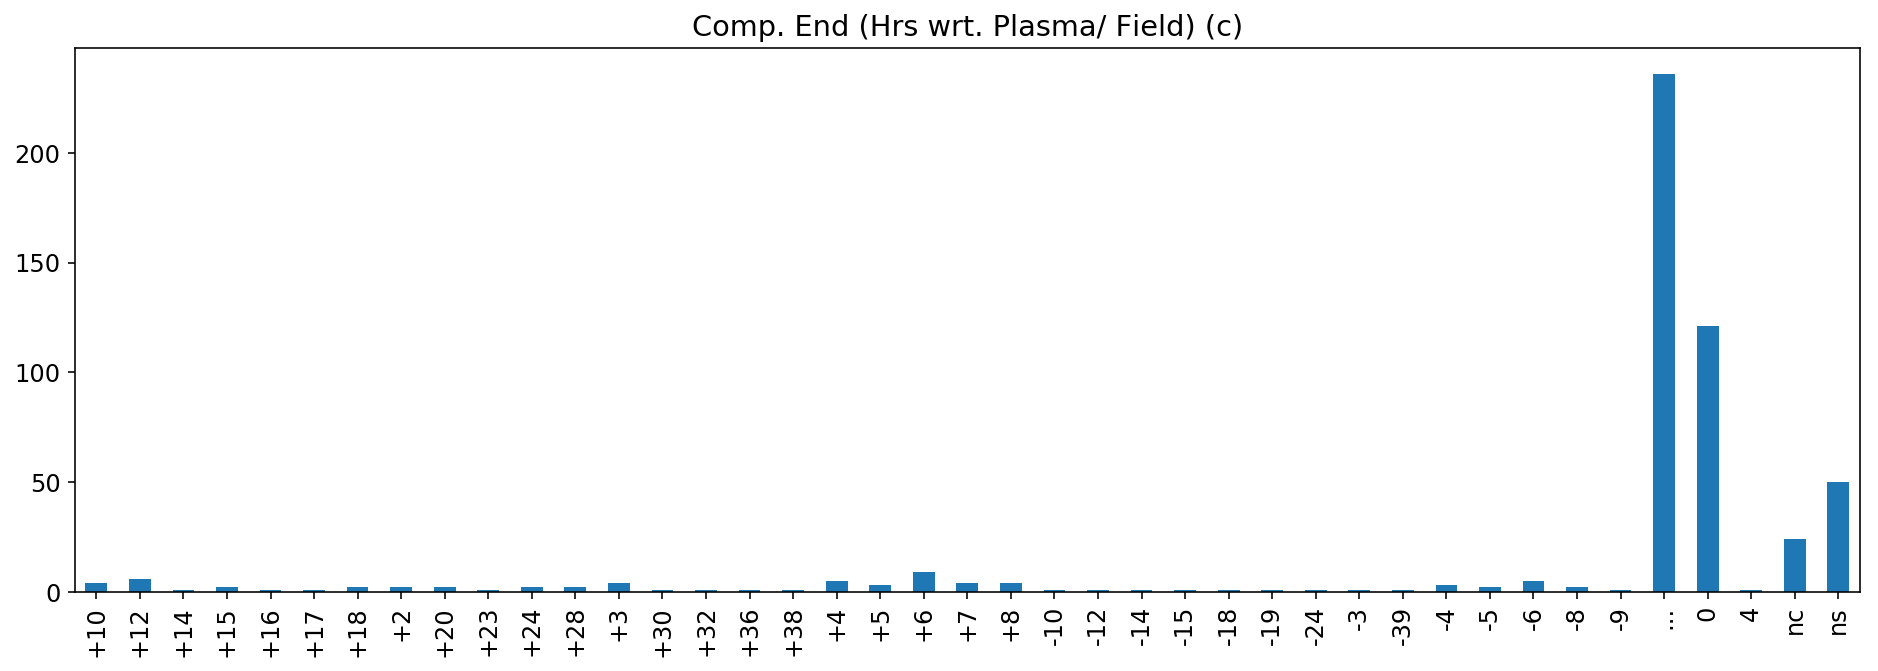

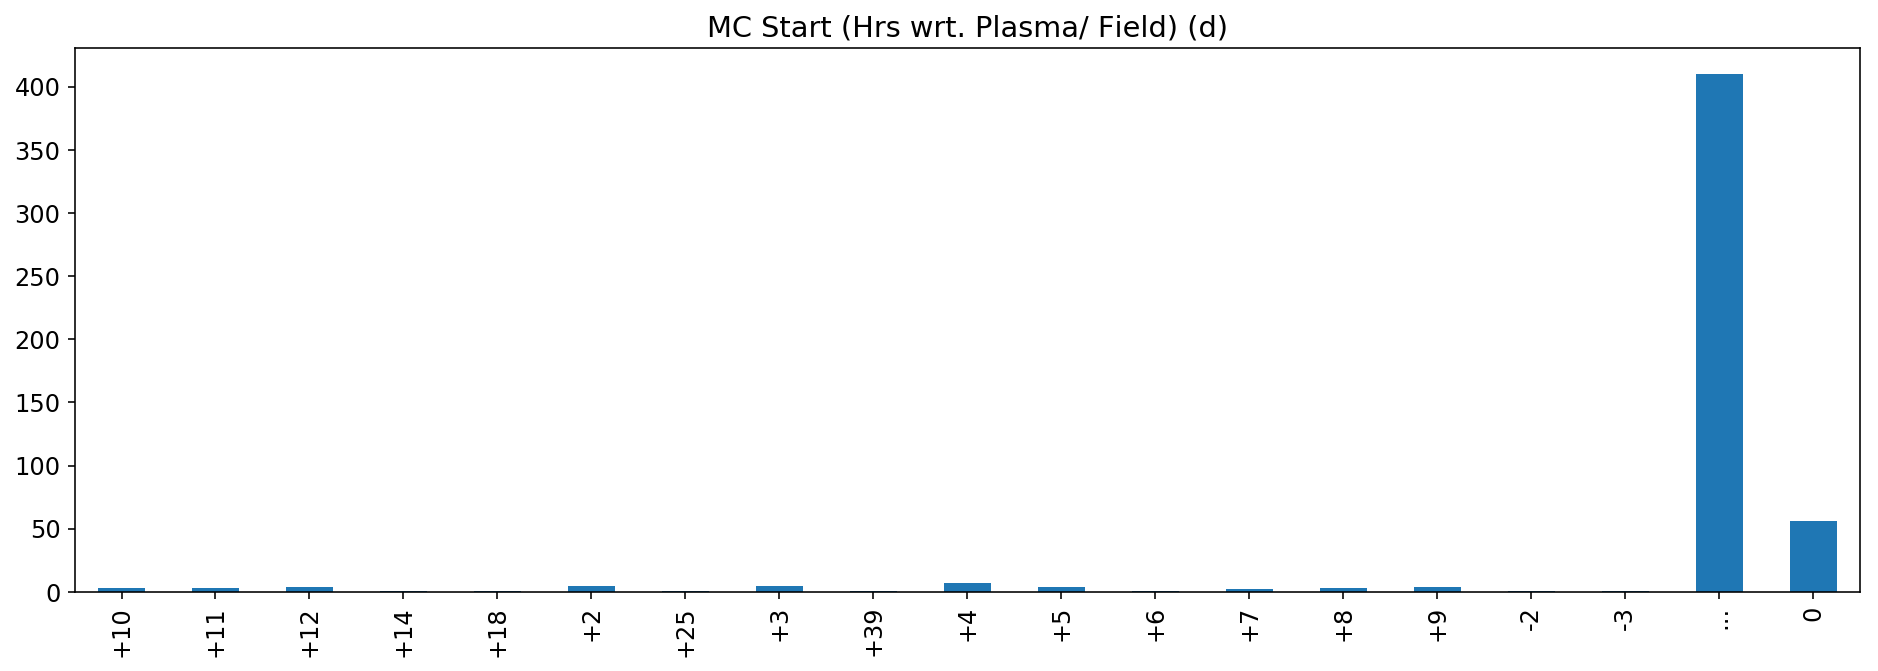

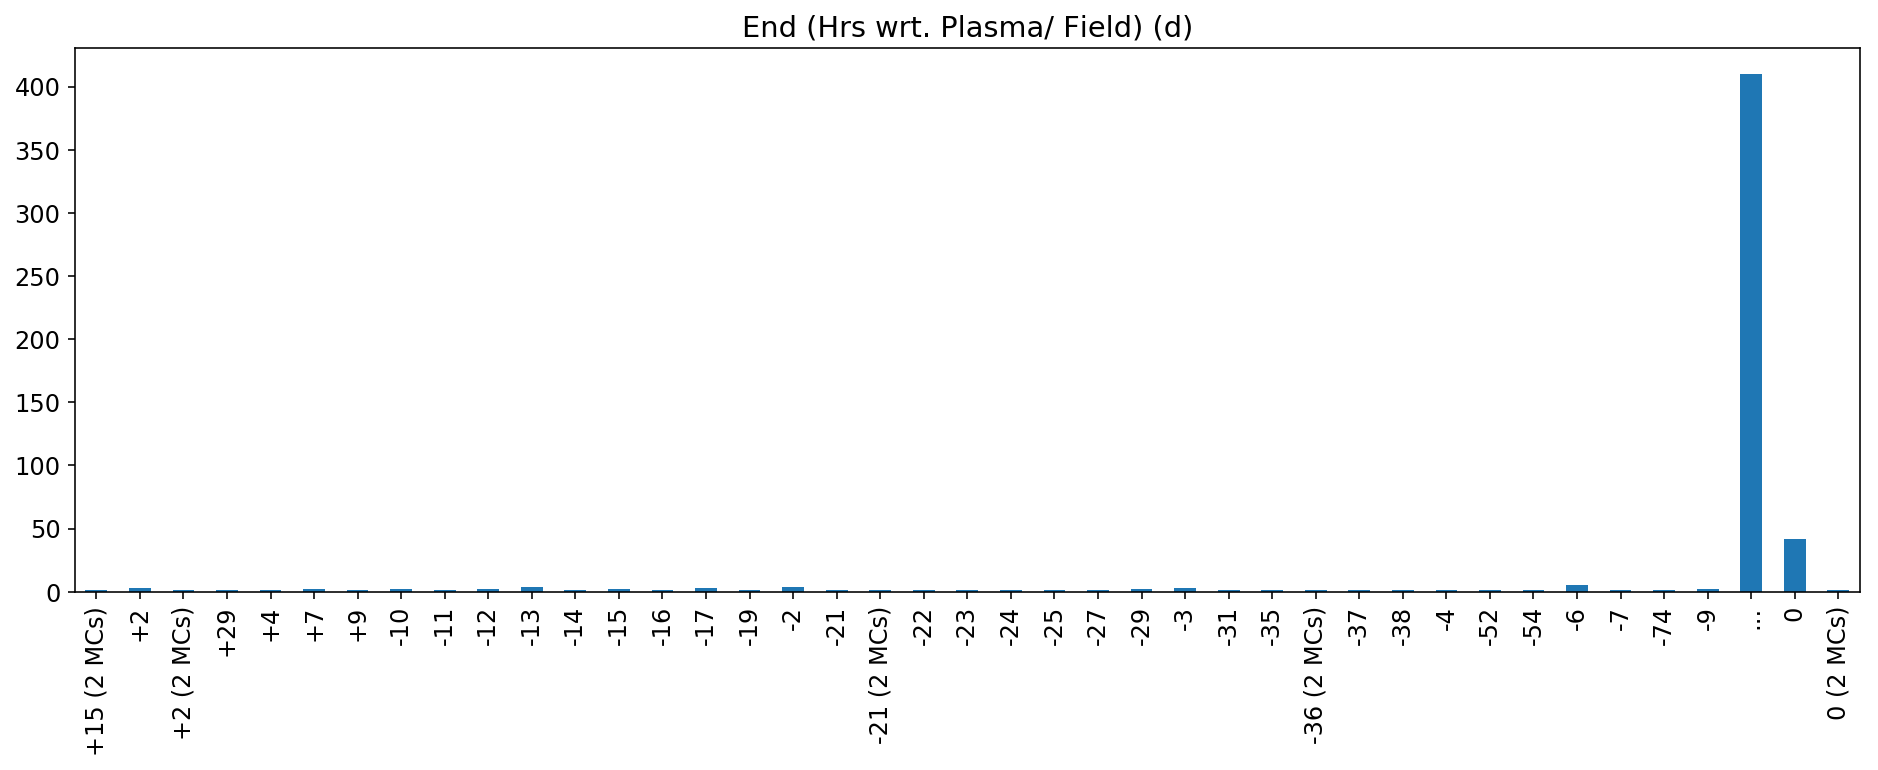

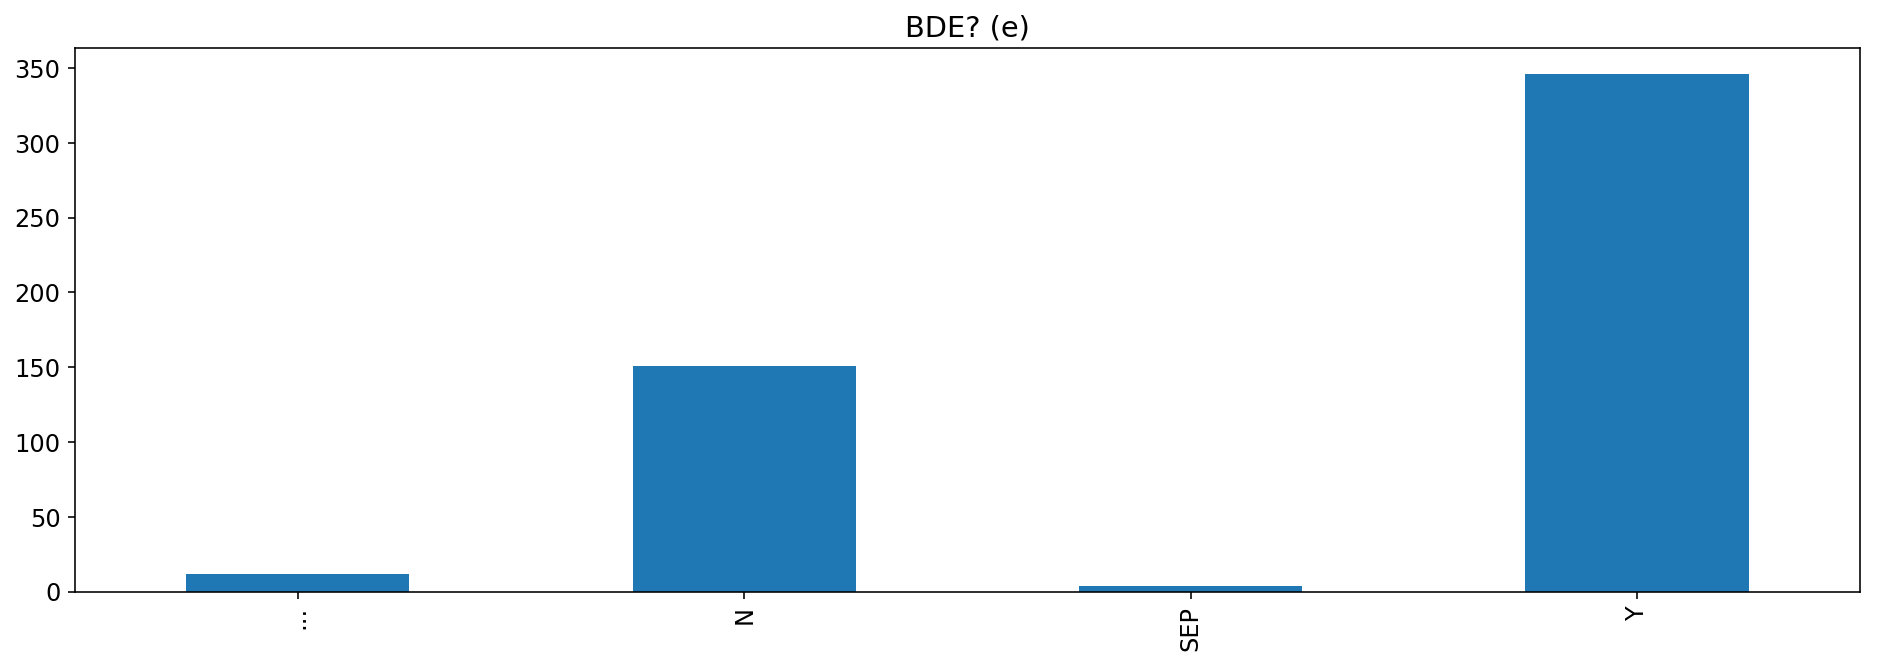

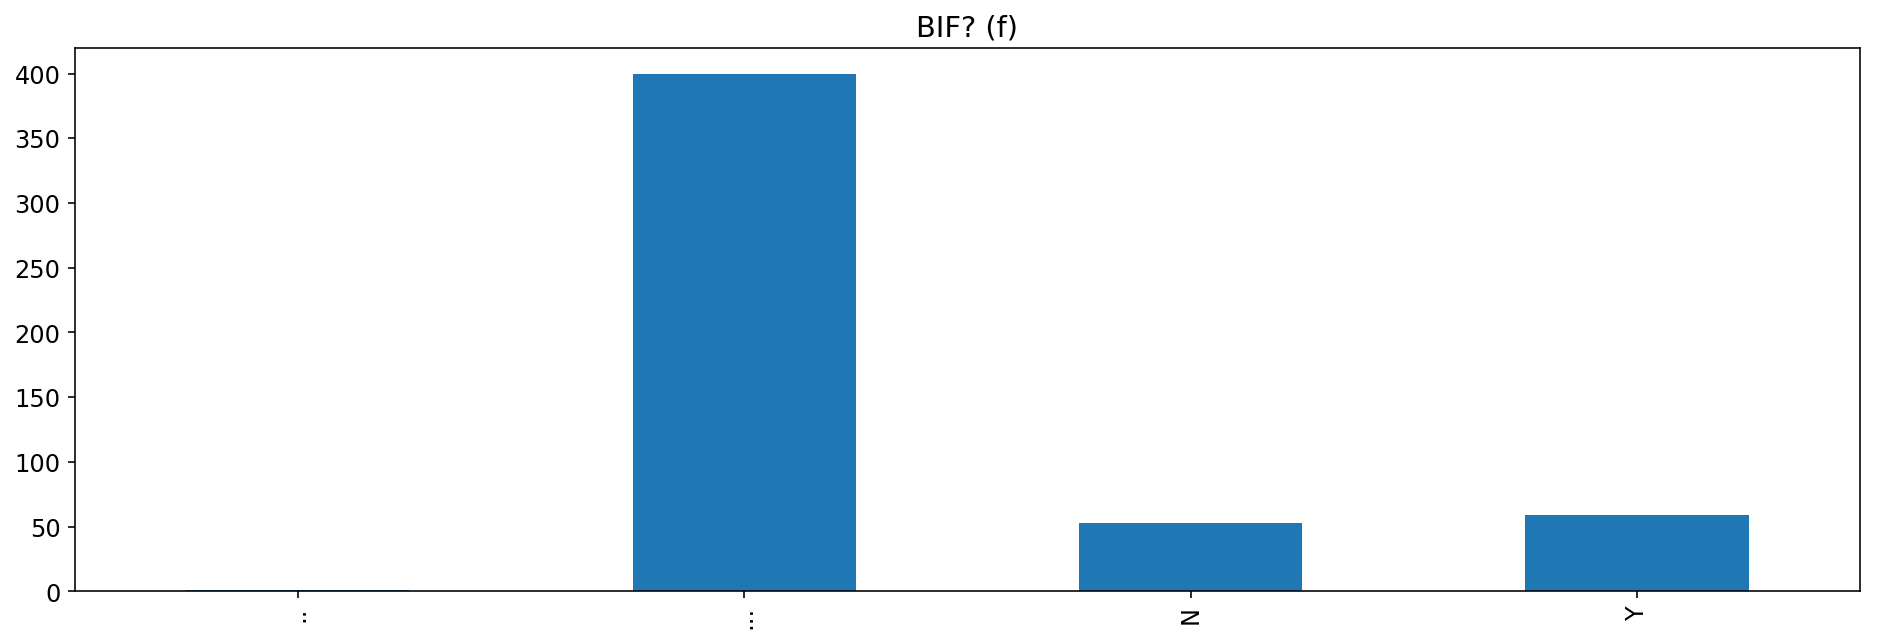

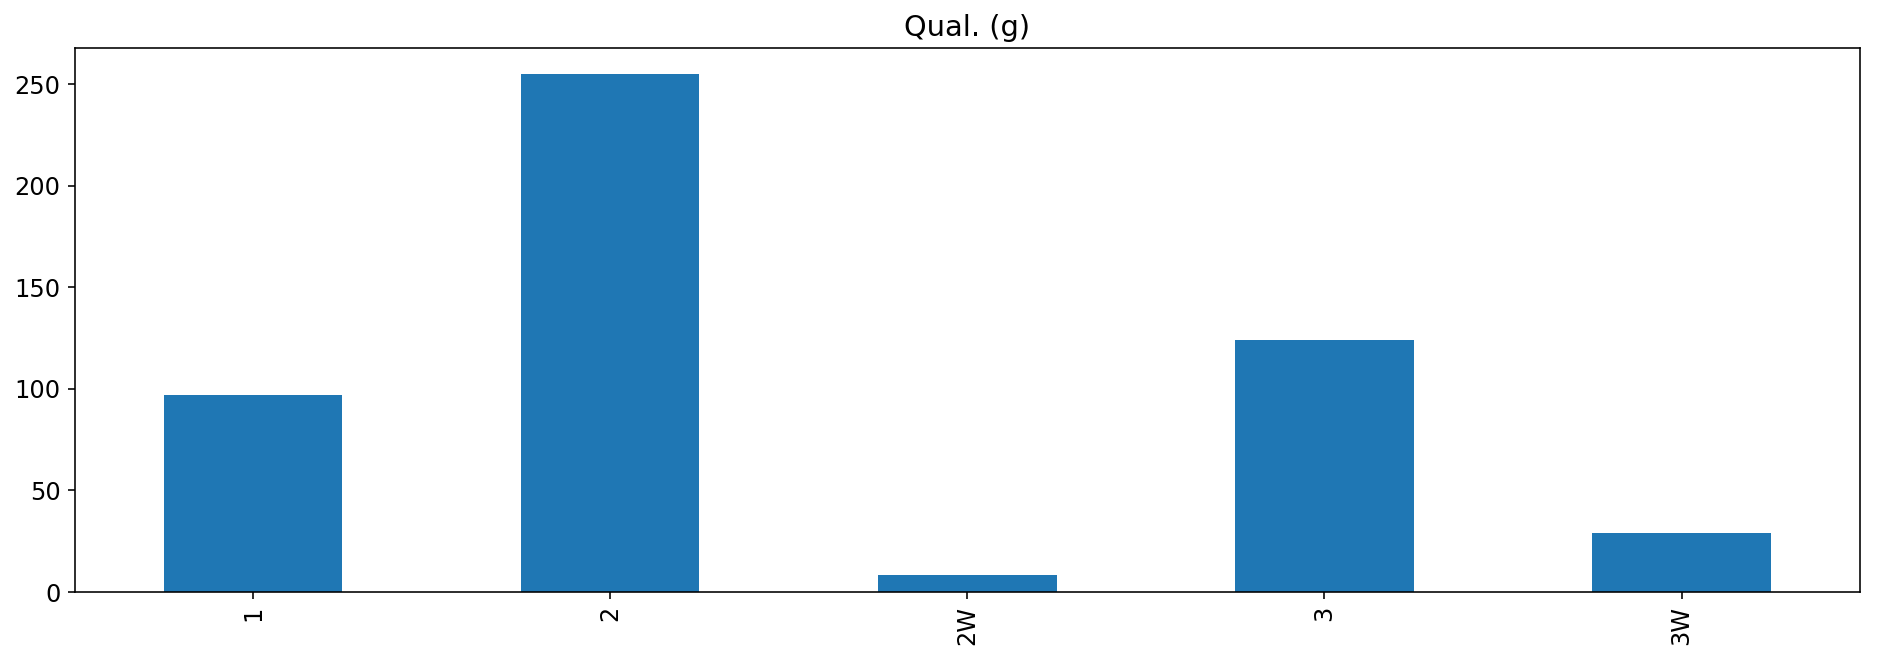

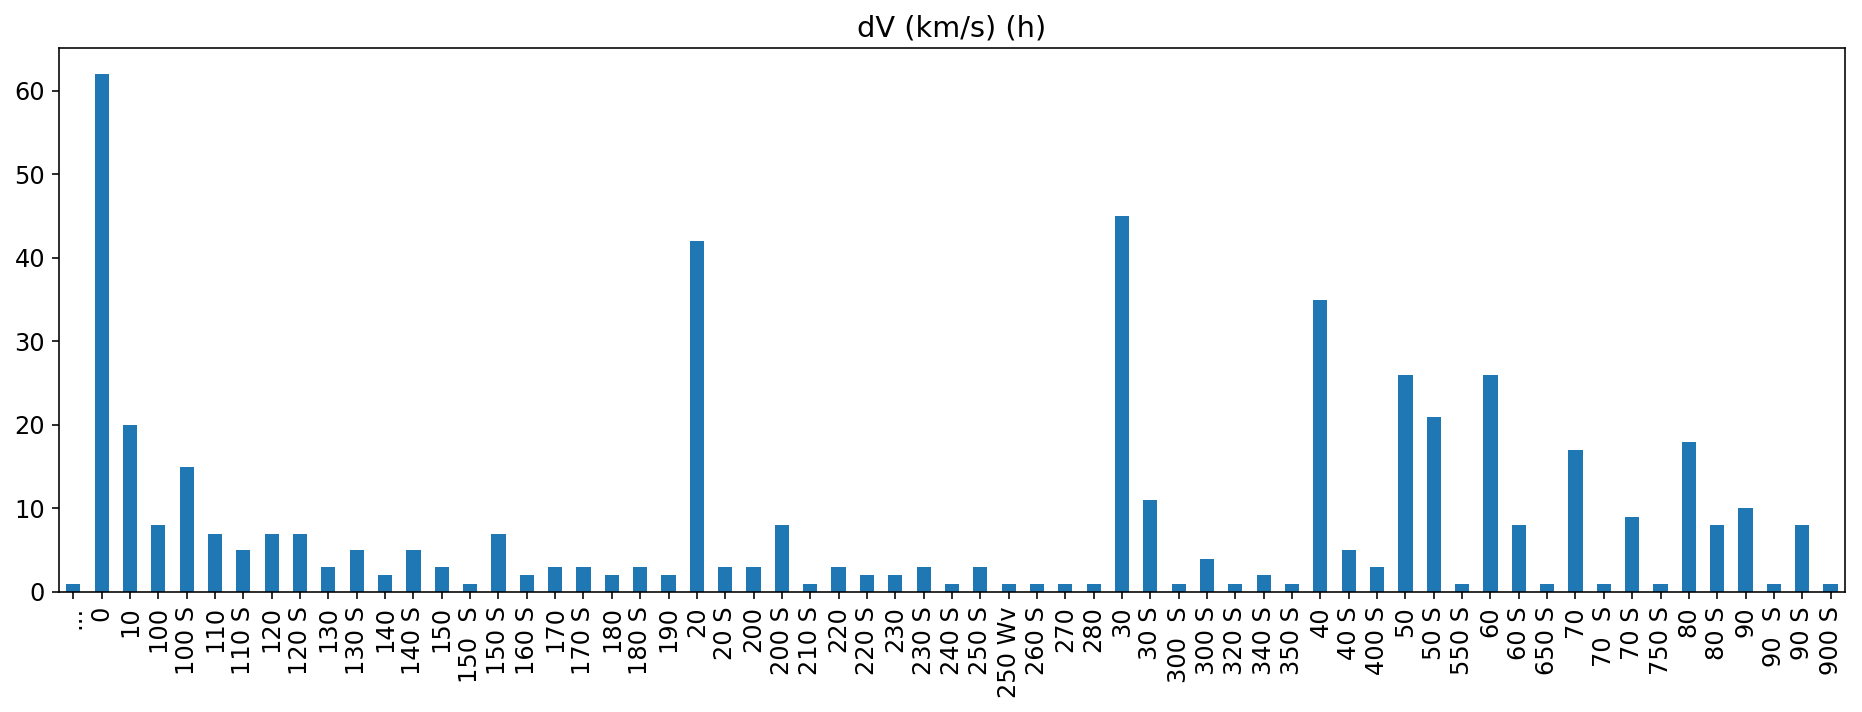

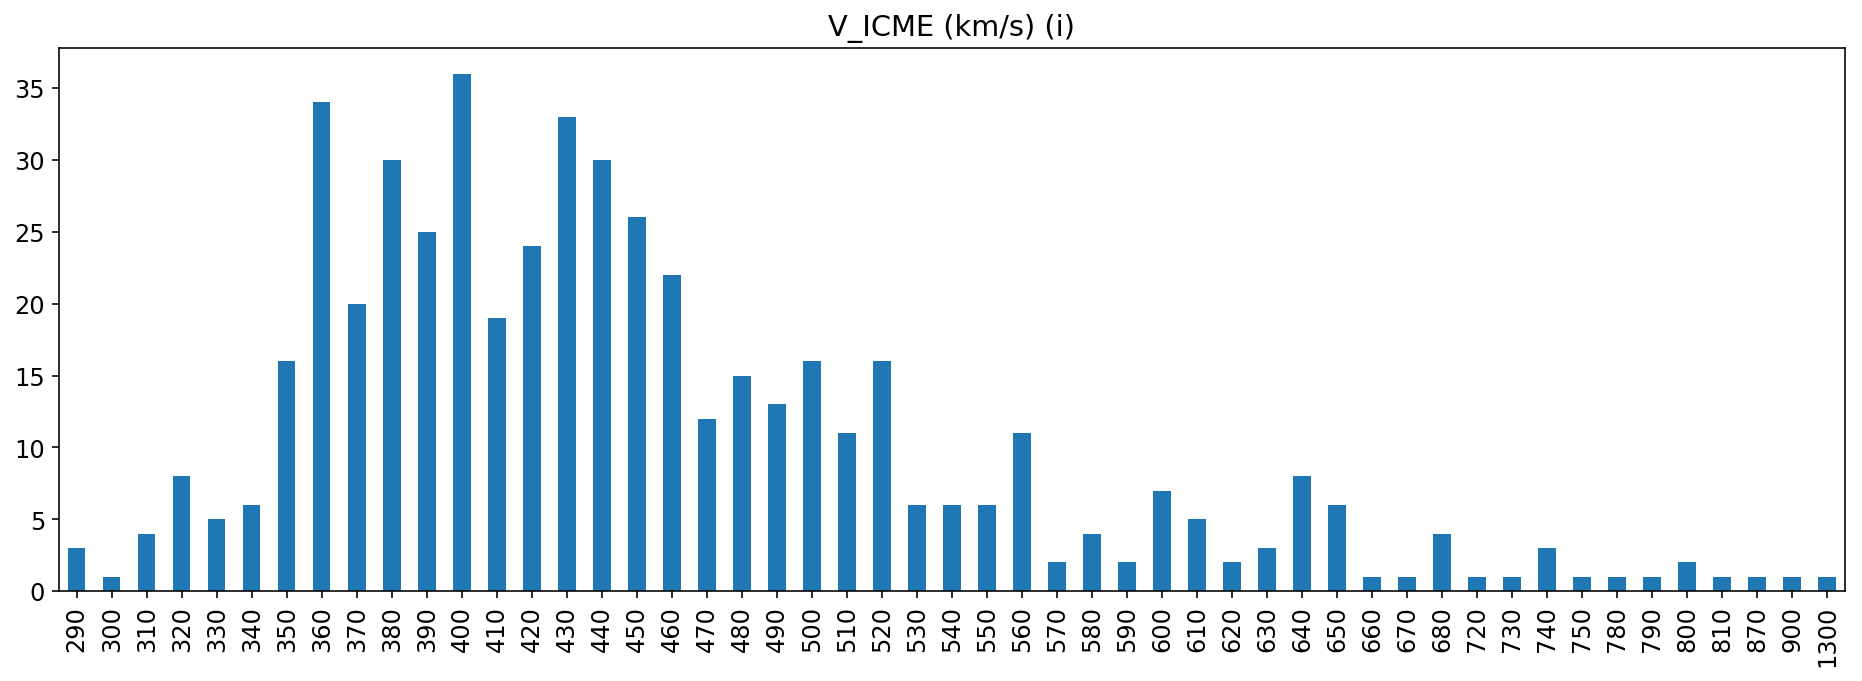

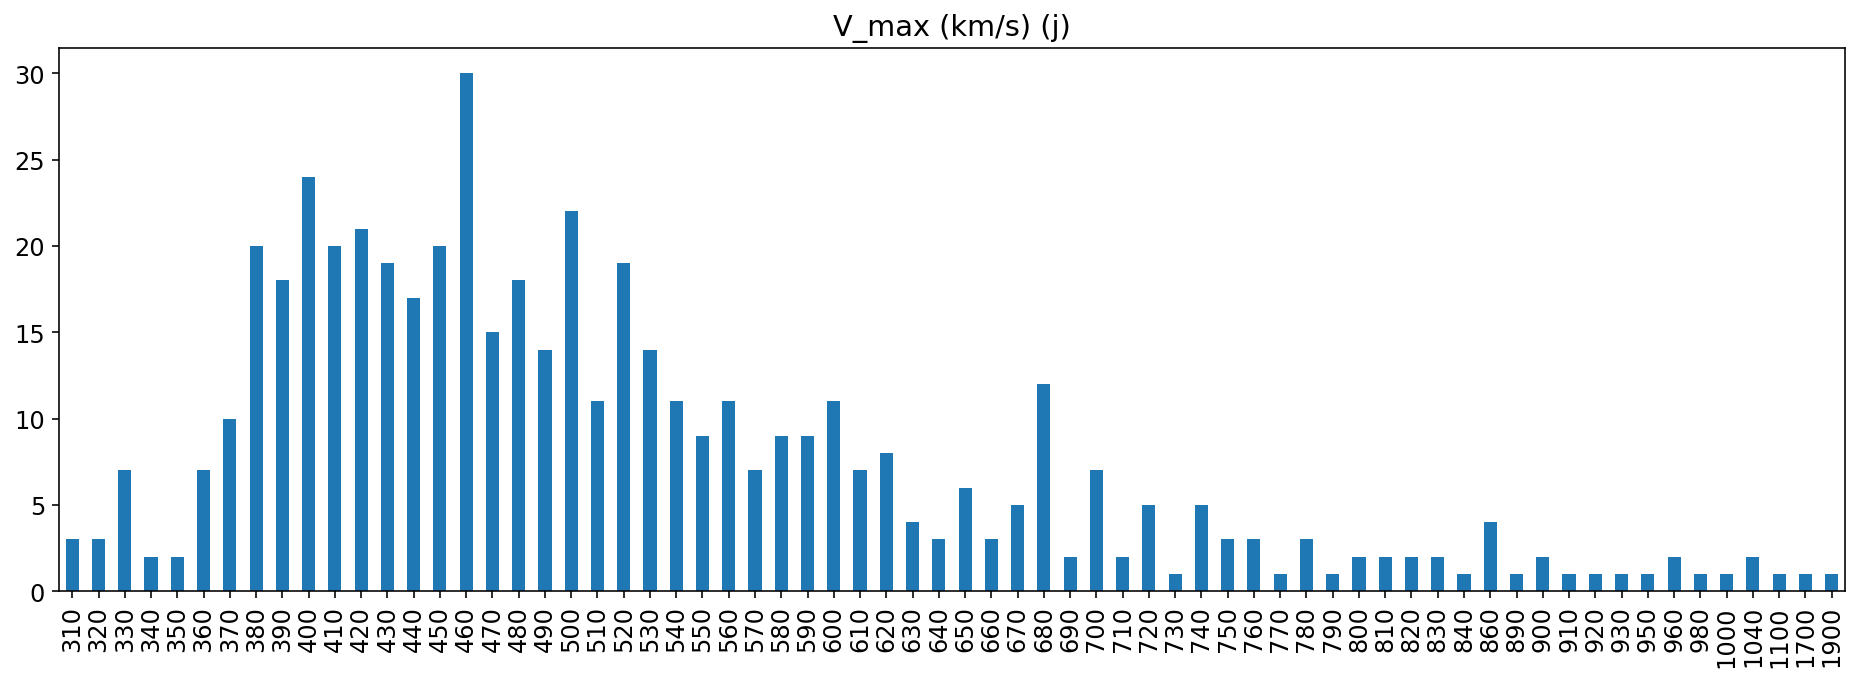

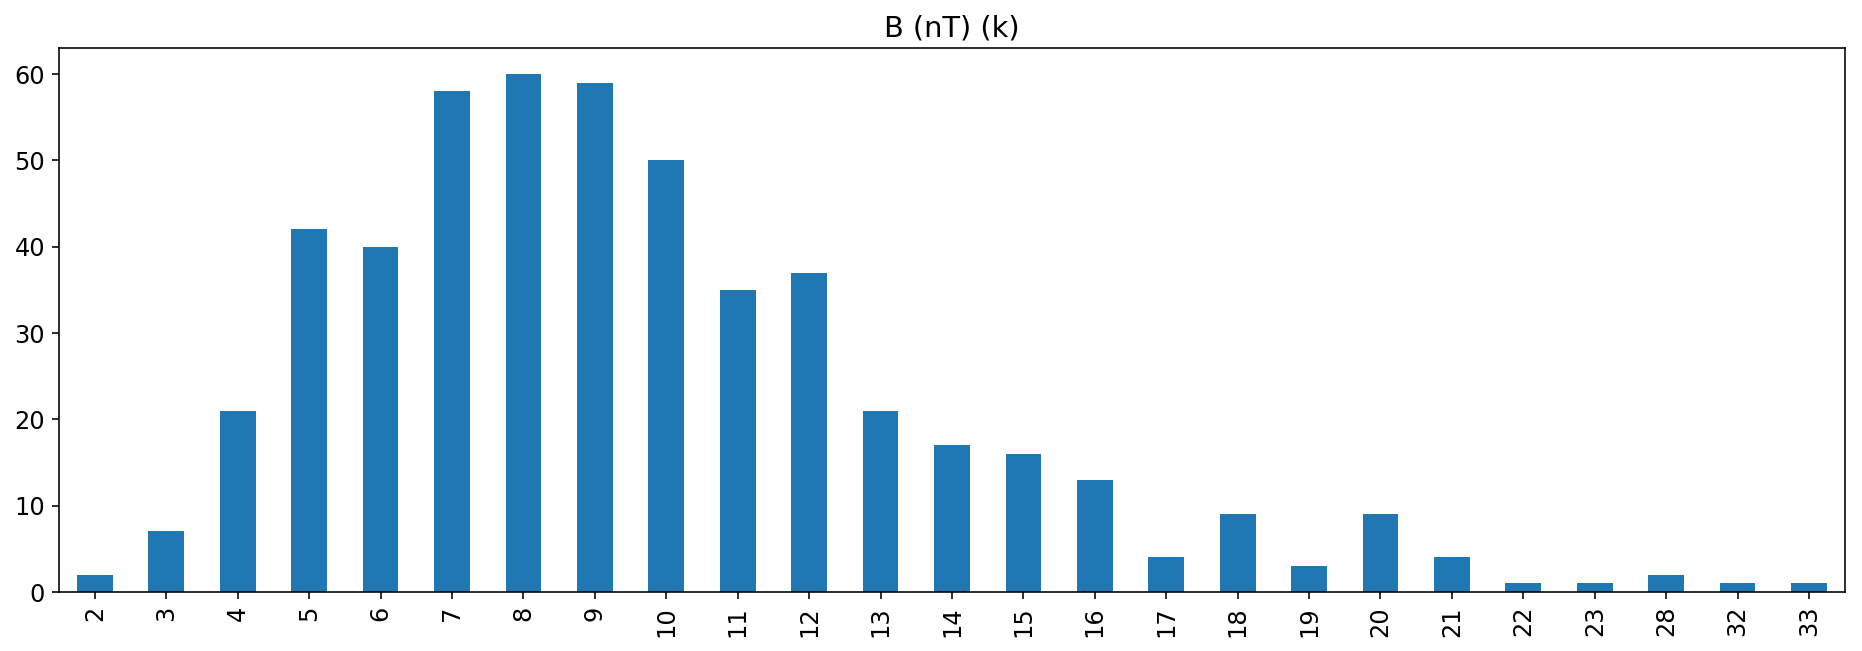

In [32]:
cols = [
       'Comp. Start (Hrs wrt. Plasma/ Field) (c)',
       'Comp. End (Hrs wrt. Plasma/ Field) (c)',
       'MC Start (Hrs wrt. Plasma/ Field) (d)',
       'End (Hrs wrt. Plasma/ Field) (d)', 'BDE? (e)', 'BIF? (f)', 'Qual. (g)',
       'dV (km/s) (h)', 'V_ICME (km/s) (i)', 'V_max (km/s) (j)', 'B (nT) (k)',
       ]
plt.figure(figsize=(6,4))
for col in cols:
    
    df[col].value_counts().sort_index().plot(kind='bar', rot=90, 
                                             figsize=(16,5),title=col,
                                            )
    

    plt.show()

## BDE

Evidence of BiDirectional suprathermal Electron strahls (BDE) in ACE/SWEPAM Observations. If data are unavailable from SWEPAM (data commence on 10/22/97), observations from the 3-D P instrument on WIND are referred to. "SEP" indicates that an intense solar energetic particle event was in progress at the time of ICME passage and electron flows therefore cannot be determined.

In [33]:
df['BDE? (e)'].value_counts().sort_index()

...     12
N      151
SEP      4
Y      346
Name: BDE? (e), dtype: int64

In [34]:
df.groupby("BDE? (e)")["V_max (km/s) (j)"].describe().T

BDE? (e),...,N,SEP,Y
count,12.000000,151.000000,4.000000,346.000000
mean,463.333333,479.470199,537.500000,546.560694
std,126.802160,101.763046,187.505555,175.186917
min,310.000000,310.000000,400.000000,310.000000
25%,380.000000,410.000000,422.500000,430.000000
50%,425.000000,460.000000,470.000000,500.000000
75%,547.500000,520.000000,585.000000,610.000000
max,680.000000,910.000000,810.000000,1900.000000


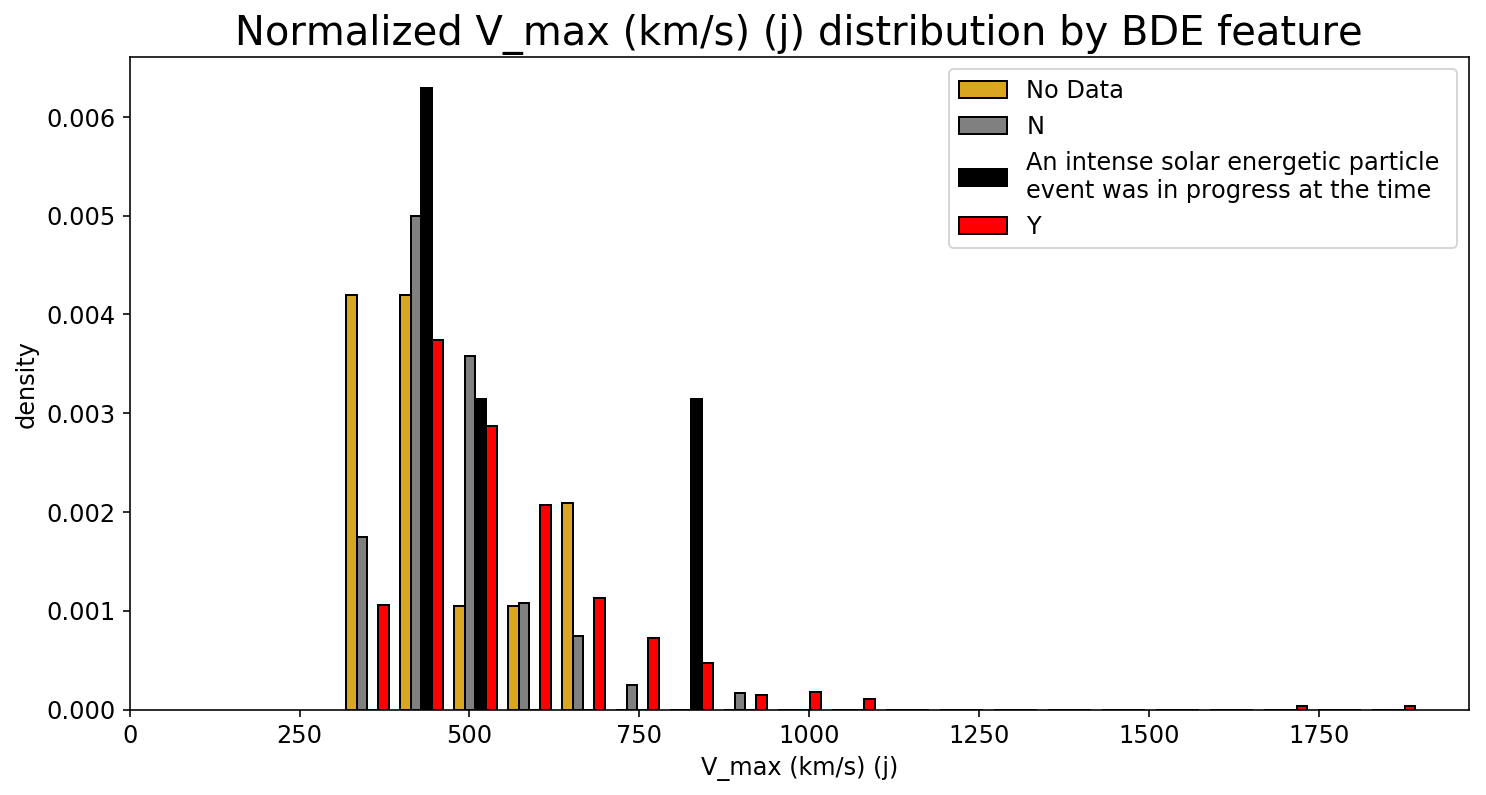

In [35]:
# check out BDE as target

sub_BDE_3dot_mask = df["BDE? (e)"] == '...'
sub_BDE_N_mask = df["BDE? (e)"] == 'N'
sub_BDE_SEP_mask = df["BDE? (e)"] == 'SEP'
sub_BDE_Y_mask = df["BDE? (e)"] == 'Y'

plt.figure(figsize=(12,6))
plt.hist([df[sub_BDE_3dot_mask]['V_max (km/s) (j)'], 
          df[sub_BDE_N_mask]['V_max (km/s) (j)'],
          df[sub_BDE_SEP_mask]['V_max (km/s) (j)'], 
          df[sub_BDE_Y_mask]['V_max (km/s) (j)']],
         
         bins=20, color=['goldenrod', 'grey','black', 'red'], 
         ec='k', density=True)
plt.title('Normalized V_max (km/s) (j) distribution by BDE feature', fontsize=20)
plt.xlim(0,)
plt.ylabel("density"), 
plt.xlabel("V_max (km/s) (j)")
plt.legend(['No Data', 'N', 'An intense solar energetic particle \nevent was in progress at the time', 'Y'])
plt.savefig("../Figures/" + section_fig_main_title +"EDA_BDE.png")

plt.show()

## MC

'2' indicates that a magnetic cloud has been reported in association with the ICME (see (d) above) or (occasionally, or for recent events) that by our assessment, the ICME has the clear features of a magnetic cloud but a magnetic cloud may not have been reported. 'H' indicates an event reported by Huttunen et al. Ann Geophys. (2005) 23:1-17 that is not listed by Lepping. '1' indicates that the ICME shows evidence of a rotation in field direction, but lacks some other characteristics of a magnetic cloud, for example an enhanced magnetic field. '0' indicates that the ICME is not a reported magnetic cloud, and lacks most of the typical features of a magnetic cloud, such as a smoothly rotating, enhanced magnetic field.

In [36]:
df.groupby("MC? (l)")["V_max (km/s) (j)"].describe().T

MC? (l),0,1,2,2H
count,153.000000,168.000000,178.000000,14.000000
mean,546.470588,516.250000,506.685393,620.714286
std,152.597987,146.886601,142.795820,384.396916
min,310.000000,310.000000,320.000000,350.000000
25%,430.000000,430.000000,410.000000,435.000000
50%,510.000000,490.000000,460.000000,525.000000
75%,630.000000,570.000000,557.500000,642.500000
max,1100.000000,1700.000000,1040.000000,1900.000000


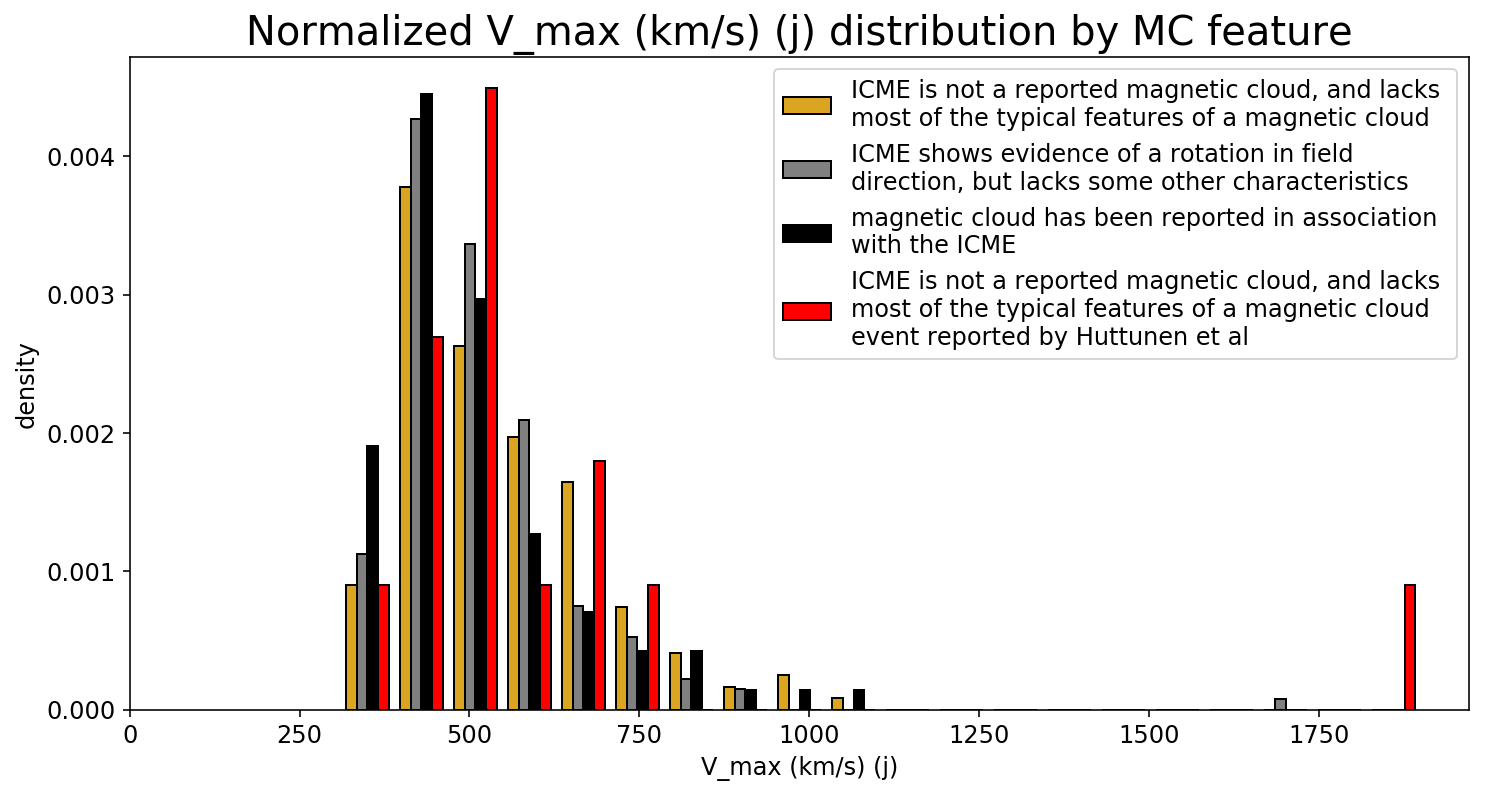

In [37]:
# check out MC? (l) as target

sub_MC_0_mask = df["MC? (l)"] == '0'
sub_MC_1_mask = df["MC? (l)"] == '1'
sub_MC_2_mask = df["MC? (l)"] == '2'
sub_MC_2H_mask = df["MC? (l)"] == '2H'

plt.figure(figsize=(12,6))
plt.hist([df[sub_MC_0_mask]['V_max (km/s) (j)'], 
          df[sub_MC_1_mask]['V_max (km/s) (j)'],
          df[sub_MC_2_mask]['V_max (km/s) (j)'], 
          df[sub_MC_2H_mask]['V_max (km/s) (j)']],
         
         bins=20, color=['goldenrod', 'grey','black', 'red'], 
         ec='k', density=True)
plt.title('Normalized V_max (km/s) (j) distribution by MC feature', fontsize=20)
plt.xlim(0,)
plt.ylabel("density"), 
plt.xlabel("V_max (km/s) (j)")
plt.legend(['ICME is not a reported magnetic cloud, and lacks \nmost of the typical features of a magnetic cloud', 
            'ICME shows evidence of a rotation in field \ndirection, but lacks some other characteristics', 
            'magnetic cloud has been reported in association \nwith the ICME ', 
            'ICME is not a reported magnetic cloud, and lacks \nmost of the typical features of a magnetic cloud \nevent reported by Huttunen et al'])
plt.savefig("../Figures/" + section_fig_main_title +"EDA_MC.png")

plt.show()

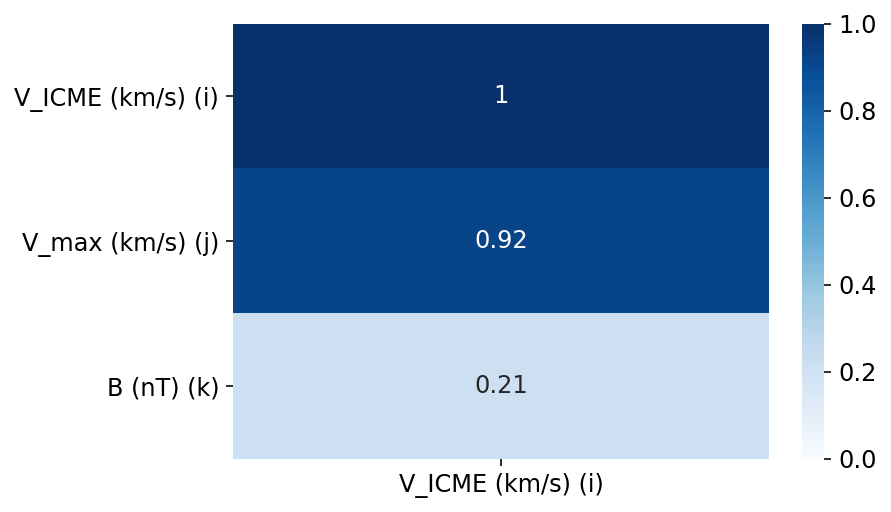

In [38]:
df_corr = numeric_df.corr().abs()

#plt.figure(figsize=(6,6))
plt.figure(figsize=(6,4))
sns.heatmap(df_corr[['V_ICME (km/s) (i)']].sort_values(by=['V_ICME (km/s) (i)'],ascending=False),
            vmin=0,
            cmap='Blues',
            annot=True);
plt.savefig("../Figures/" + section_fig_main_title +"plt1_corr_1.png")
plt.show()

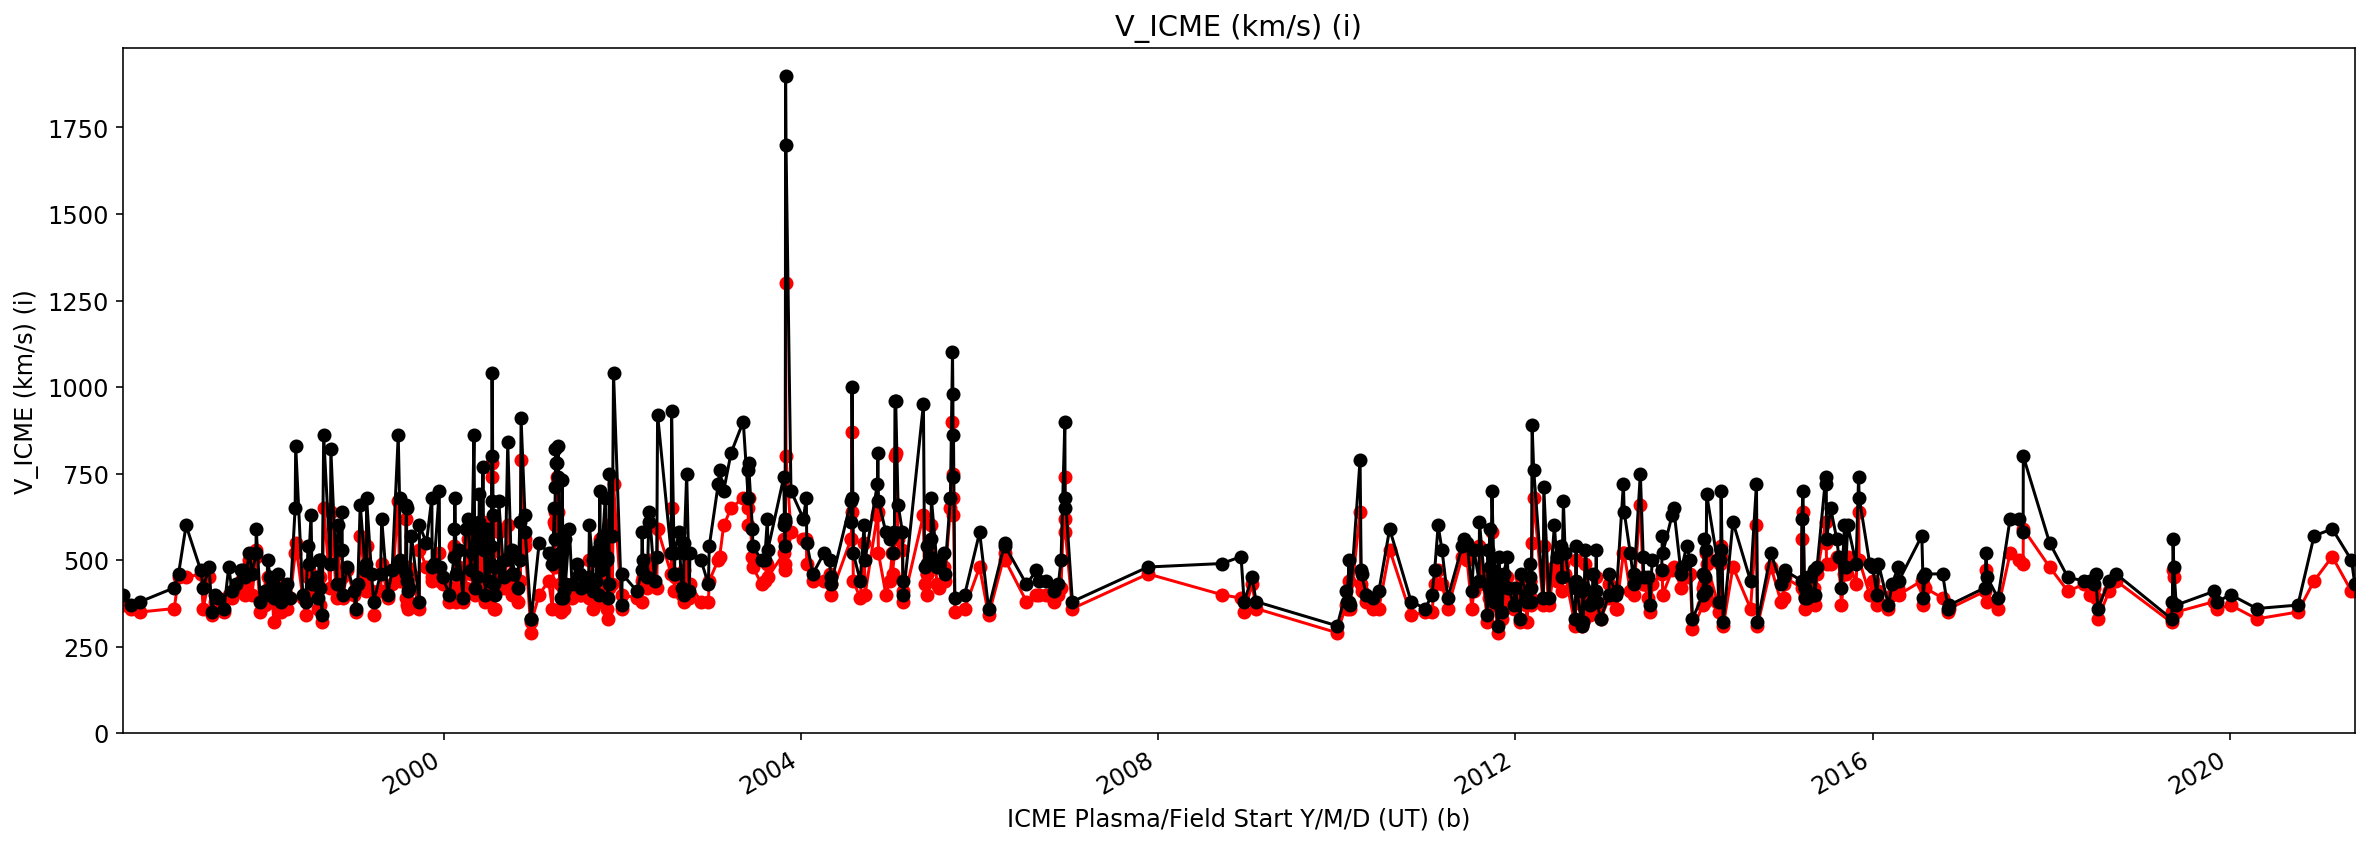

In [39]:
plt.figure(figsize=(20,7))
numeric_df["V_ICME (km/s) (i)"].plot(style="ro-")
numeric_df["V_max (km/s) (j)"].plot(style="ko-")


plt.title("V_ICME (km/s) (i)")
plt.ylabel("V_ICME (km/s) (i)")
plt.ylim(0,)

plt.savefig("../Figures/" + section_fig_main_title +"plt1.png")

plt.show()

it is clear that there are some lack of data in some time intervals around 2008 to 2011.

In [ ]:
plt.figure(figsize=(20,7))
numeric_df["B (nT) (k)"].plot(style="ro-")



plt.title("V_ICME (km/s) (i)")
plt.ylabel("V_ICME (km/s) (i)")
plt.ylim(0,)

plt.savefig("../Figures/" + section_fig_main_title +"plt2.png")

plt.show()

In [ ]:
plt.figure(figsize=(20,7))
numeric_df["V_ICME (km/s) (i)"].plot(style="ro-")


plt.title("V_ICME (km/s) (i)")
plt.ylabel("V_ICME (km/s) (i)")
plt.ylim(0,)
plt.savefig("../Figures/" + section_fig_main_title +"plt33.png")

plt.show()

In [ ]:
numeric_df.dtypes

fit a linear regression model on data.

In [ ]:
lr = LinearRegression()
X = numeric_df[['V_max (km/s) (j)', 'B (nT) (k)']]
y = numeric_df['V_ICME (km/s) (i)']
lr.fit(X, y)
y_pred = lr.predict(X)

In [ ]:
score = lr.score(X, y)
MAE = metrics.mean_absolute_error(y, y_pred)

In [ ]:
plt.rcParams["figure.figsize"] = (8, 8)
# plt.rcParams["font.family"] = "Times New Roman"

In [ ]:
plt.scatter(y_pred, y, alpha=0.4)
plt.xlabel("Predicted ICME speed (km/s)")
plt.ylabel("Data ICME speed (km/s)")
plt.title("linear regression model")
plt.savefig("../Figures/" + section_fig_main_title +"lr_1.png")

plt.show()

In [ ]:

# Creat residuals
resids = y - y_pred
# N assumption:
plt.hist(resids, bins=70, alpha=0.4);
plt.xlabel("residuals")
plt.ylabel("count")
plt.title("linear regression model residuals hist plot")
plt.savefig("../Figures/" + section_fig_main_title +"lr_residu_1.png")

In [ ]:
plt.scatter(y_pred, resids, alpha=0.4)
plt.axhline(0, color='orange');
plt.xlabel("data point")
plt.ylabel("residual")
# plt.xlim(0,)
plt.ylim(-200,200)
plt.title("linear regression model residuals")
plt.savefig("../Figures/" + section_fig_main_title +"lr_residu_1.png")

In [ ]:
X_sm = sm.add_constant(X)
ols = sm.OLS(y, X_sm).fit()
ols.summary()

In [ ]:
def plot(colm_1_name, colm_2_name, lab_name, fromm, too, sizee):
    ax = plt.gca()
    sub_df = df[fromm:too]
    sub_df.plot(kind="scatter", 
                x=colm_1_name, y=colm_2_name,
                s=sub_df[lab_name]/sizee, 
                label=lab_name, 
                c=sub_df[lab_name], 
                cmap=plt.get_cmap("jet"),
                colorbar=True,
                alpha=0.4, figsize=(10,7), 
                ax = ax
                )

    plt.legend()
#     plt.show()
    plt.tight_layout()

In [ ]:
numeric_df.columns

In [ ]:
colm_1_name = 'V_max (km/s) (j)'
colm_2_name = 'V_ICME (km/s) (i)'
lab_name = 'B (nT) (k)'
fromm = 0
too = 513
sizee = 0.02

plot(colm_1_name, colm_2_name, lab_name, fromm, too, sizee)
plt.savefig("../Figures/" + section_fig_main_title +"scat_plt_1.png")

plt.show()

In [ ]:
colm_1_name = 'V_max (km/s) (j)'
colm_2_name = 'B (nT) (k)'
lab_name = 'V_ICME (km/s) (i)'
fromm = 0
too = 513
sizee = 1

plot(colm_1_name, colm_2_name, lab_name, fromm, too, sizee)
plt.savefig("../Figures/" + section_fig_main_title +"scat_plt_2.png")

plt.show()

In [ ]:
numeric_df.head()

In [ ]:
numeric_df.dtypes

In [ ]:
numeric_df.head()

In [ ]:
# # ref: https://gist.github.com/balzer82/5cec6ad7adc1b550e7ee
# # ref : https://towardsdatascience.com/analyzing-time-series-data-in-pandas-be3887fdd621
# import statsmodels.api as sm
# from pylab import rcParams

# # rcParams['figure.figsize'] = 11, 9
# decomposition = sm.tsa.seasonal_decompose(numeric_df['V_max (km/s) (j)'], 
#                                           model="additives", 
#                                           period=1).plot()

In [ ]:
lag_list = [1,3,5,10,50,100]
plt.figure(figsize=(14,10))
for i, lag in enumerate(lag_list):
    
    plt.subplot(2,3,i+1)
    lag_plot(numeric_df['V_max (km/s) (j)'], lag=lag)
    plt.title(f"lag={lag}")

# pyplot.title("Temperature c")
plt.tight_layout()
plt.savefig("../Figures/" + section_fig_main_title +"lags_plt_1.png")

plt.show()

In [ ]:
# source https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/
plt.figure(figsize=(14,10))
autocorrelation_plot(numeric_df['V_max (km/s) (j)'])
plt.title("CME speed auto corr")
plt.savefig("../Figures/" + section_fig_main_title +"autocorr_plt_1.png")

plt.show()

almost no significant autocorrelation is seen in data for ICME max speed

In [ ]:
plt.rc("figure", figsize=(22,6))
sm.graphics.tsa.plot_pacf(numeric_df['V_max (km/s) (j)'].values.squeeze(), lags=100)
plt.xlabel('lags', fontsize=18)
plt.ylabel('auto-corr', fontsize=18)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.savefig("../Figures/" + section_fig_main_title +"autocorr_plt_2.png")

plt.show()

as it is observed the partial autocorrelation after two lags are pretty low which is a sign of stationary data.

The data auto-correlation decay instantly which is a sign of stationary data.

Two methods can be used for evaluating the time series data inclduing, Plotting Rolling Statistics and Dickey-Fuller Test.

In [ ]:
# modified ref: https://www.kaggle.com/kanncaa1/time-series-prediction-tutorial-with-eda
# adfuller library 
from statsmodels.tsa.stattools import adfuller

In [ ]:
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
    
# check_mean_std
def check_mean(ts,windo):
    #Rolling statistics
    
    rolmean = pd.Series(ts).rolling(window=windo).mean()
    rolstd = pd.Series(ts).rolling(window=windo).std()
    
    
#     rolmean = pd.rolling_mean(ts, window=6)
#     rolstd = pd.rolling_std(ts, window=6)
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
#     std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("ICME lm/s")
    plt.title('Rolling Mean')
    
#     plt.ylim(0,)
    
    plt.legend()
    
    plt.savefig("../Figures/" + section_fig_main_title +"rollmean_plt_1.png")
    plt.show()
    
    
    
# check_mean_std
def check_std(ts, windo):
    #Rolling statistics
    
    rolmean = pd.Series(ts).rolling(window=windo).mean()
    rolstd = pd.Series(ts).rolling(window=windo).std()
    
    
#     rolmean = pd.rolling_mean(ts, window=6)
#     rolstd = pd.rolling_std(ts, window=6)
    plt.figure(figsize=(22,10))   
#     orig = plt.plot(ts, color='red',label='Original')
#     mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("ICME lm/s")
    plt.title('Rolling Standard Deviation')
    
#     plt.ylim(0,)
    
    plt.legend()
    plt.savefig("../Figures/" + section_fig_main_title +"rollstd_plt_1.png")

    plt.show()

In [ ]:
# check stationary: mean, variance(std)and adfuller test
check_mean(numeric_df['V_max (km/s) (j)'], windo=30)

it is seen that the mean is not constant (black curve) so it looks like that we do have NO STATIONARY pressure data.



In [ ]:
check_std(numeric_df['V_max (km/s) (j)'], windo=30)

the roll std of data is not constant so we can infer that we do have NO - STATIONARY data.

Let's check out the last method and see if the data is stationary.

Using adfuller to find out if the data is stationary:

If the test statistic is less than the critical value, we can say that the time series is stationary.

In [ ]:
check_adfuller(numeric_df['V_max (km/s) (j)'])

the adfuller shows the pressure data is STATIONARY - the test stat is less than 10%.

based on adfuller test all data are stationary with 90% confidence.

In case of having non stationary data, several approaches can be applied to fix the data. There are two reasons for having non-stationary data including Seasonality and trend. The data has trend when the data mean (is function of window size) varied versus time and Seasonality is cycles that are repeat over time.